In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

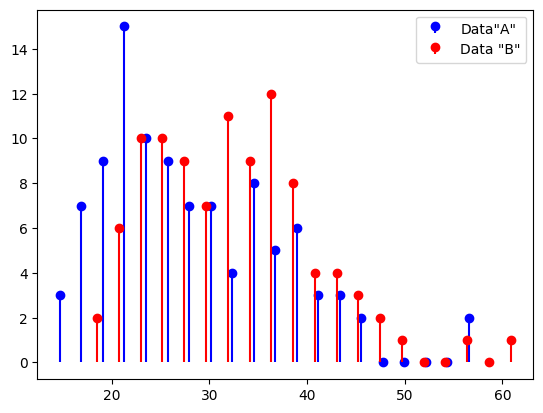

In [2]:
# simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA, xA = np.histogram(dataA, 20)
xA = (xA[:-1] + xA[1:]) / 2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

# get histogram values for later comparison
yB, xB = np.histogram(dataB, 20)
xB = (xB[:-1]+xB[1:])/2

plt.stem(xA, yA, 'b', markerfmt='bo', basefmt=' ', label='Data"A"')
plt.stem(xB, yB, 'r', markerfmt='ro', basefmt=' ', label='Data "B"')
plt.legend()
plt.show()

In [3]:
# mix trails together

# concatenate trials
alldata = np.hstack((dataA, dataB))

# condition labels
conds = np.hstack((np.ones(N), 2*np.ones(N)))

In [4]:
# generate one null hypothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled conditon lables
fakeconds[fakeconds < N] = 1
fakeconds[fakeconds > 1] = 2

# these two means should be different
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])

[28.1091895792433, 32.325302027305796]
[30.823463421611045, 29.61102818493804]


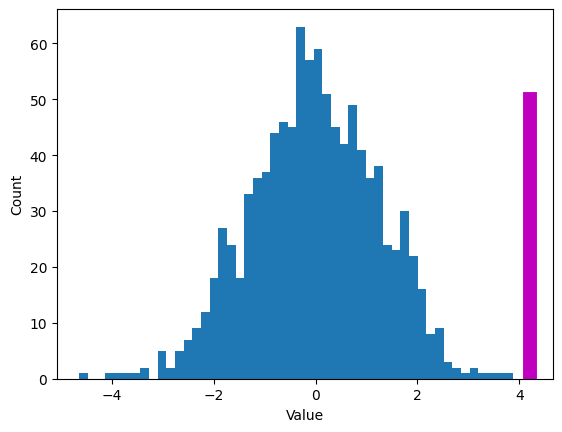

In [5]:
# now the distribution of null hypothesis value

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds < N] = 1
    fconds[fconds > 1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])

# plot the distribution of H0 values
plt.hist(permdiffs, 50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval], [0, 50], 'm', linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [6]:
# two methods of evaluating statistical significance

# Z-value
zVal = (obsval - np.mean(permdiffs)) / np.std(permdiffs, ddof=1)
p = 1 - stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs > obsval) / nPerms

print(p, pCount)

0.0003388606397833893 0.0
